In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import scipy.stats as st
import ast

In [2]:
# Checking the working directory

import os

print(os.getcwd())

c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025


In [3]:
# Function to load a cleaned dataset from a pickle (.pkl) file
# Input: path (str) - file path to the pickle file
# Output: pandas DataFrame containing the loaded data

def load_data(path):
    
    """
    Loads a cleaned dataset from a pickle file.

    Parameters:
    path (str): Path to the .pkl file.

    Returns:
    pd.DataFrame: Loaded dataset as a pandas DataFrame.
    """
    return pd.read_pickle(path)


In [4]:
# Downloading the Pickle version cleanned dataset

df = load_data(r'c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025\df_clean.pkl')

In [5]:
# Create a copy of the original DataFrame for analysis purposes

df_copy = df.copy()

## Dataset Overview

This dataset has been filtered to include only job postings from 2022 to 2025. It contains cleaned data on job titles, salary information, locations, employment types, remote work options, and platforms (websites). Below is a breakdown of key metadata and the preparatory steps taken before analysis.

In [6]:
# Filter df_copy DataFrame to include only data for the year 2022

df_2022 = df_copy[df_copy['year'] == 2022].copy()

In [7]:
# Filter df_copy DataFrame to include only data for the year 2023

df_2023 = df_copy[df_copy['year'] == 2023].copy()

In [8]:
# Filter df_copy DataFrame to include only data for the year 2024

df_2024 = df_copy[df_copy['year'] == 2024].copy()

In [9]:
# Filter df_copy DataFrame to include only data for the year 2025

df_2025 = df_copy[df_copy['year'] == 2025].copy()

In [10]:
# Select and reorder relevant columns for analysis and reset index for clarity

df_2022 = df_2022[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

In [13]:
# Select and reorder relevant columns for analysis and reset index for clarity

df_2023 = df_2023[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

In [14]:
# Select and reorder relevant columns for analysis and reset index for clarity

df_2024 = df_2024[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

In [15]:
# Select and reorder relevant columns for analysis and reset index for clarity

df_2025 = df_2025[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

### Remote Work Availability Over Time (2022 -2025)

The pie charts below illustrates the distribution of data job postings offering remote work options versus those that do not from 2022 to 2025. This provides a clear overview of how flexible data roles were during the four year span.

In [33]:
# DataFrames for each year
df_2022_pie_plot = df_2022['remote_work'].value_counts()
df_2023_pie_plot = df_2023['remote_work'].value_counts()
df_2024_pie_plot = df_2024['remote_work'].value_counts()
df_2025_pie_plot = df_2025['remote_work'].value_counts()

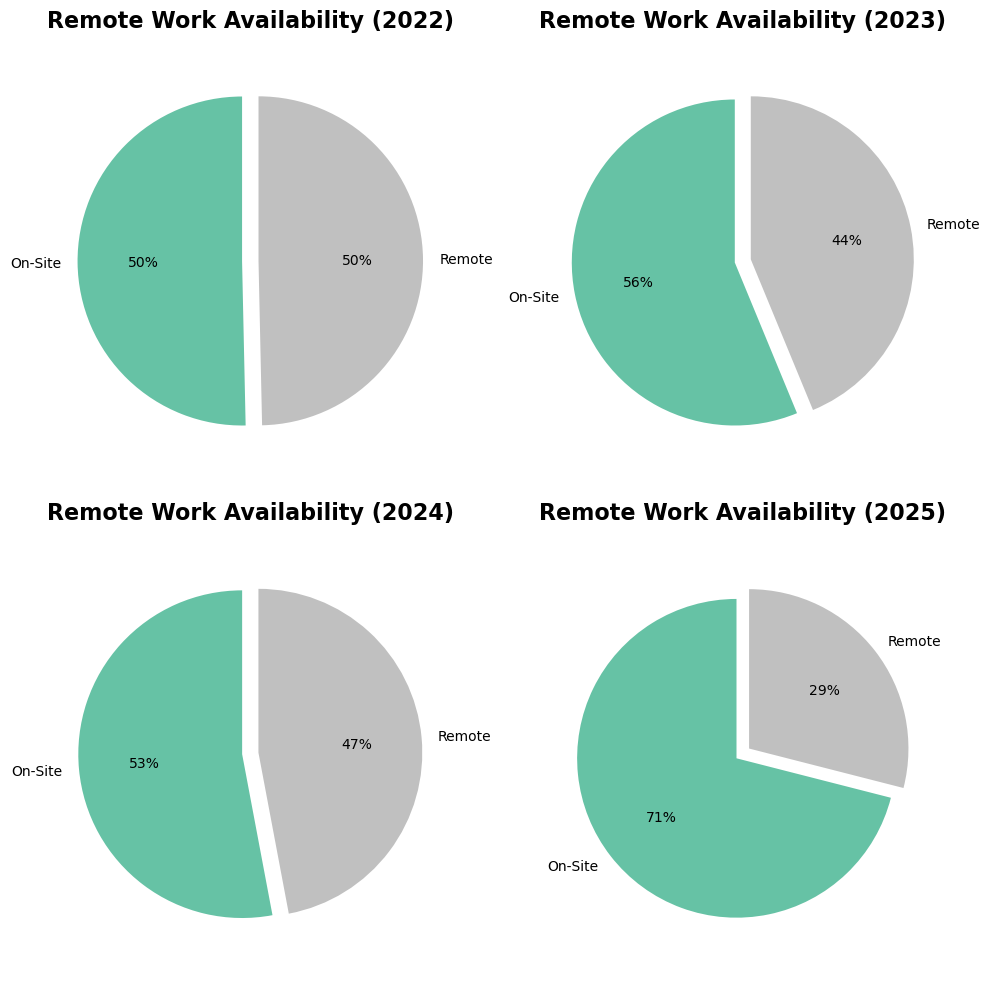

In [34]:
# Pie Charts: 2022 to 2025 U.S. Data Job Listings with Remote Work Availability



# List of DataFrames
dfs = [df_2022_pie_plot, df_2023_pie_plot, df_2024_pie_plot, df_2025_pie_plot]

# Modify labels
labels = ['On-Site', 'Remote']

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the 2D array of axes to make iteration easier
axs = axs.flatten()
# Explode the first slice to emphasize it
explode = [0.1] + [0] * (len(labels) - 1)

# Loop through each DataFrame and plot the pie chart
for i, (df, year) in enumerate(zip(dfs, range(2022, 2026))):
    df.plot.pie(ax=axs[i], autopct='%1.0f%%', startangle=90, explode=explode, labels=labels, colors=['#66c2a5', 'silver'], legend=False)
    axs[i].set_title(f'Remote Work Availability ({year})', fontsize=16, fontweight='bold')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axs[i].set_ylabel('')  # Remove y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


## Top U.S. Locations for Data Job Listings (2022 - 2025)

The bar charts displays the U.S. locations with the highest concentration of data job postings from 2022 to 2025. 
It provides insights into where data professionals are most in demand across the country.

The data reveals that "Anywhere" and "United States" are the most frequently listed locations, likely representing remote or unspecified postings. Following these, cities such as Kansas City, Oklahoma City and Jefferson City emerge as notable hubs for data job opportunities.

In [19]:
# Preparing data for graphing a subplot

df_2022_location = df_2022['location'].value_counts().head(5).reset_index()
df_2022_location.columns = ['location', 'count']


df_2023_location = df_2023['location'].value_counts().head(5).reset_index()
df_2023_location.columns = ['location', 'count']



df_2024_location = df_2024['location'].value_counts().head(5).reset_index()
df_2024_location.columns = ['location', 'count']



df_2025_location = df_2025['location'].value_counts().head(5).reset_index()
df_2025_location.columns = ['location', 'count']



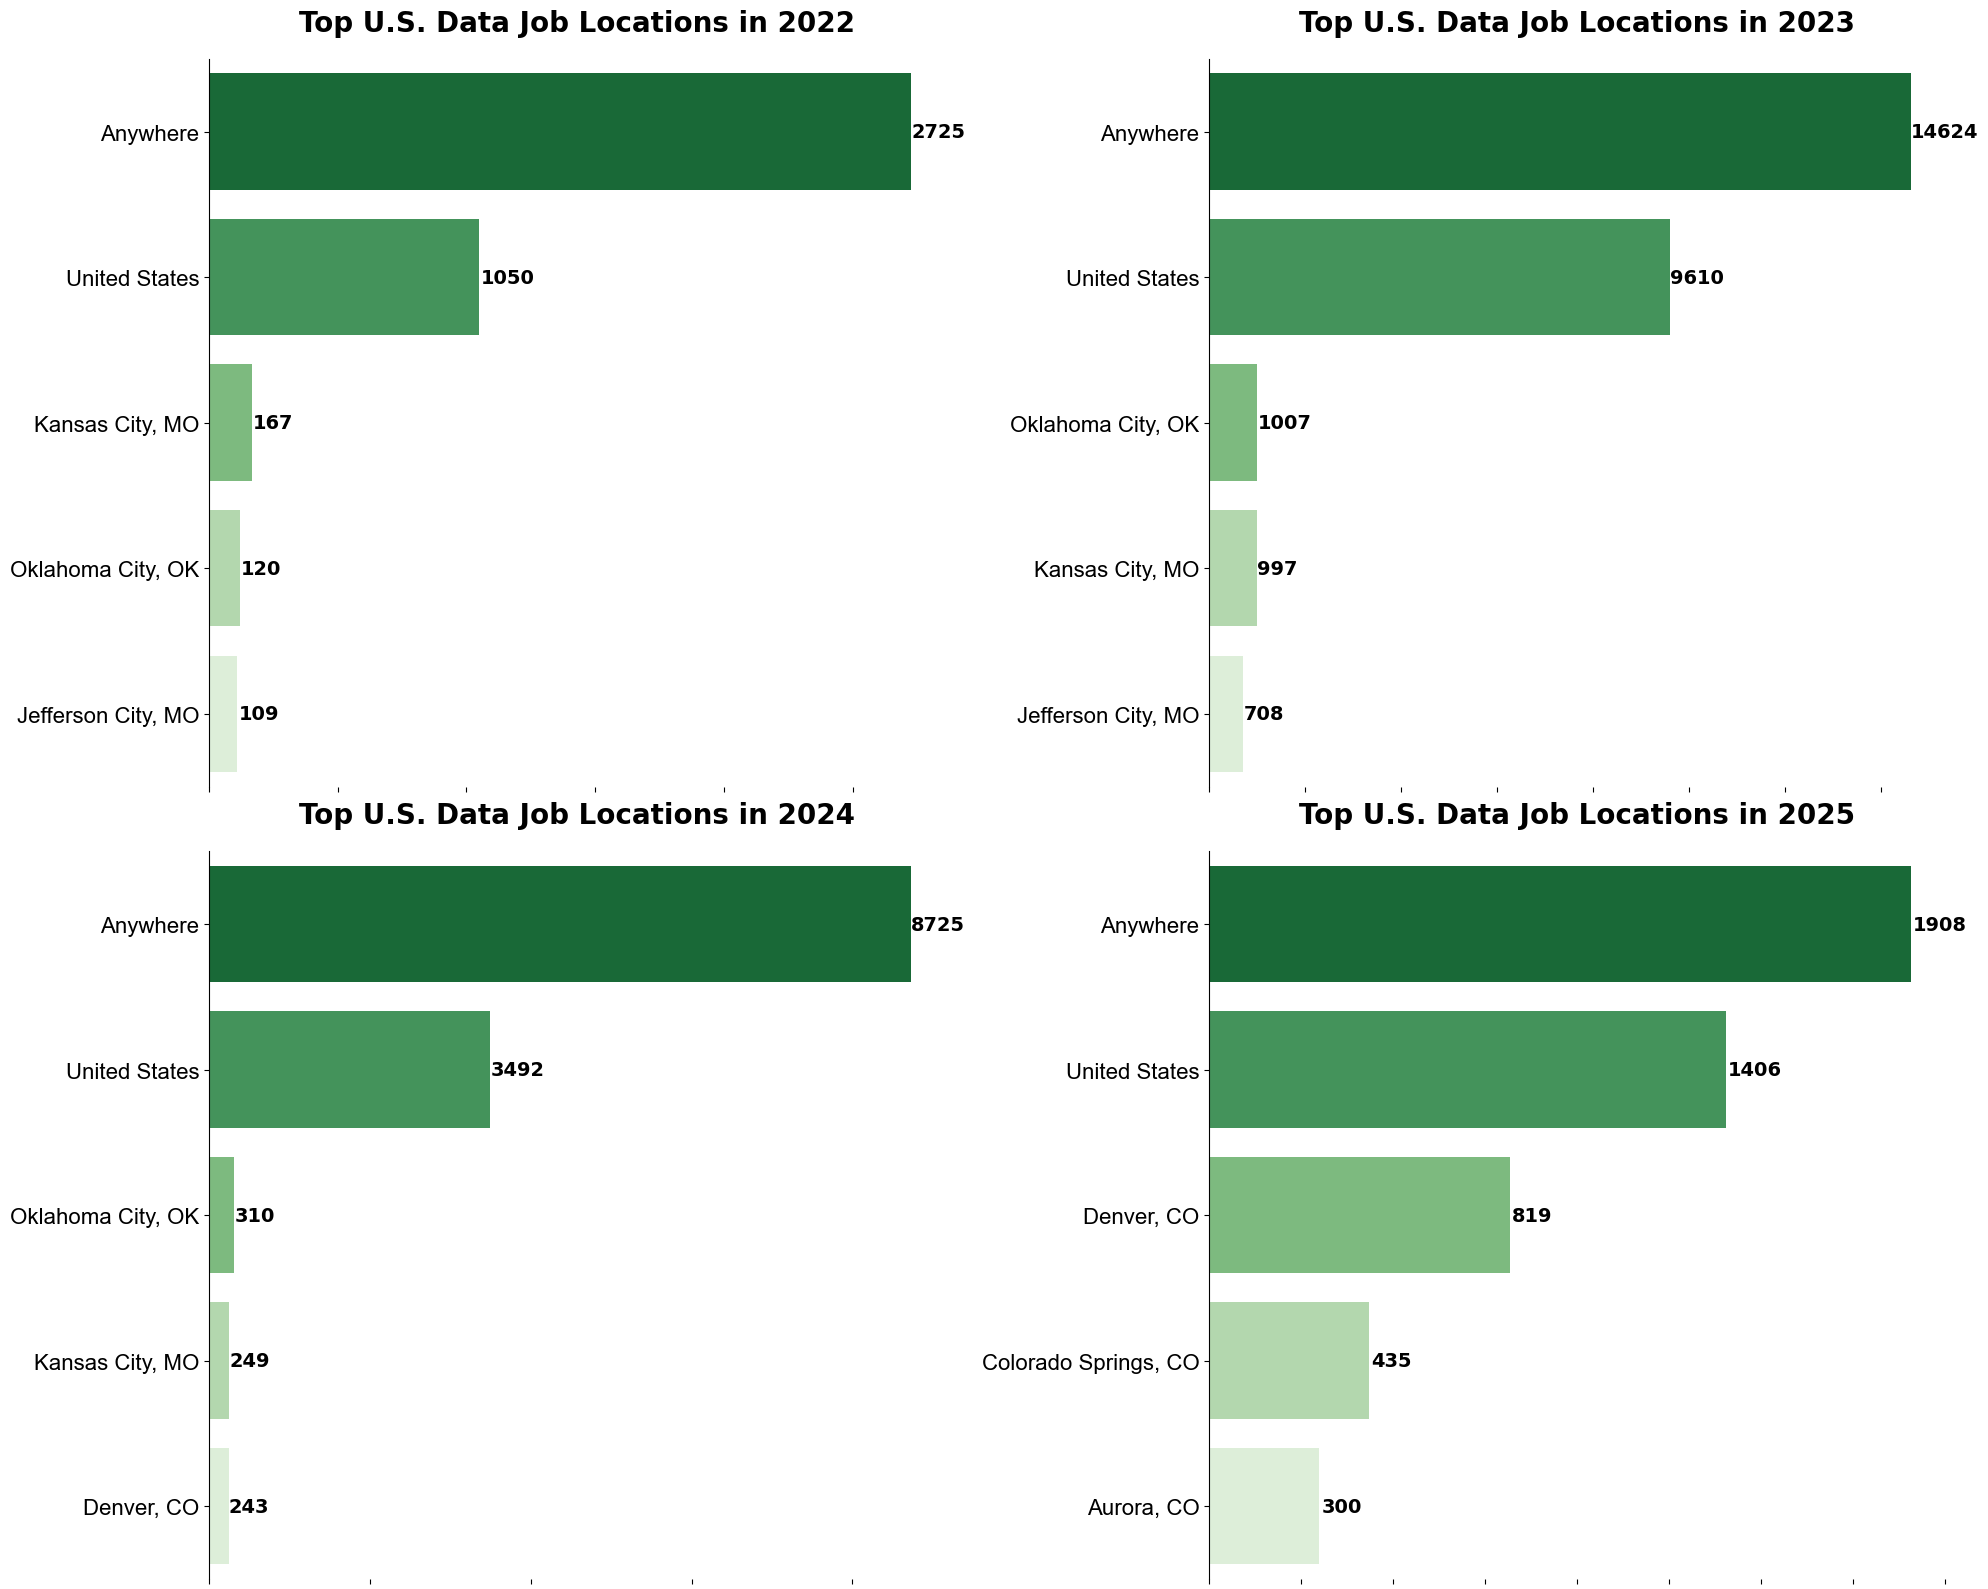

In [91]:
# Top U.S. Locations for Data Job Interest Over Time (2022 to 2025)


# List of DataFrames
dfs = [df_2022_location, df_2023_location, df_2024_location, df_2025_location]

# Define a sequential color palette 
palette = sns.color_palette('Greens', n_colors=5)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Loop through each DataFrame and plot the bar chart
for i, (df, year) in enumerate(zip(dfs, range(2022, 2026))):
    ax = axs.flat[i]
    sns.barplot(x='count', y='location', data=df, hue='count', ax=ax, palette=palette, orient='h', legend=False)
    ax.set_title(f'Top U.S. Data Job Locations in {year}', fontsize=20, fontweight='bold', pad=20)
    for label in ax.get_yticklabels():
        label.set_fontsize(16)
        label.set_fontname('Arial')

    # Annotate the bars
    for bar in ax.patches:
        ax.annotate(f'{int(bar.get_width())}', 
                    (bar.get_width() + 5, bar.get_y() + bar.get_height() / 2),
                    va='center', fontsize=14, fontweight='semibold', color='black')

# Remove spines
for ax in axs.flat:
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=True)

# Remove x-axis labels
for ax in axs.flat:
    ax.set_xlabel('')
    ax.set_xticklabels([])

# Remove the y-axis labels
for ax in axs.flat:
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## Employment Types for Data Roles from 2022 to 2025

The charts below illustrates the distribution of employment types, such as full-time, part-time, contract, and other work arrangements among data roles from 2022 to 2025. 
Understanding these employment structures provides valuable insights into how data positions are organized and the flexibility they offer.

In [22]:
df_2022_schedule = df_2022['employment_type'].value_counts().head(5).reset_index()
df_2022_schedule.columns = ['employment_type', 'count']


df_2023_schedule = df_2023['employment_type'].value_counts().head(5).reset_index()
df_2023_schedule.columns = ['employment_type', 'count']


df_2024_schedule = df_2024['employment_type'].value_counts().head(5).reset_index()
df_2024_schedule.columns = ['employment_type', 'count']


df_2025_schedule = df_2025['employment_type'].value_counts().head(5).reset_index()
df_2025_schedule.columns = ['employment_type', 'count']


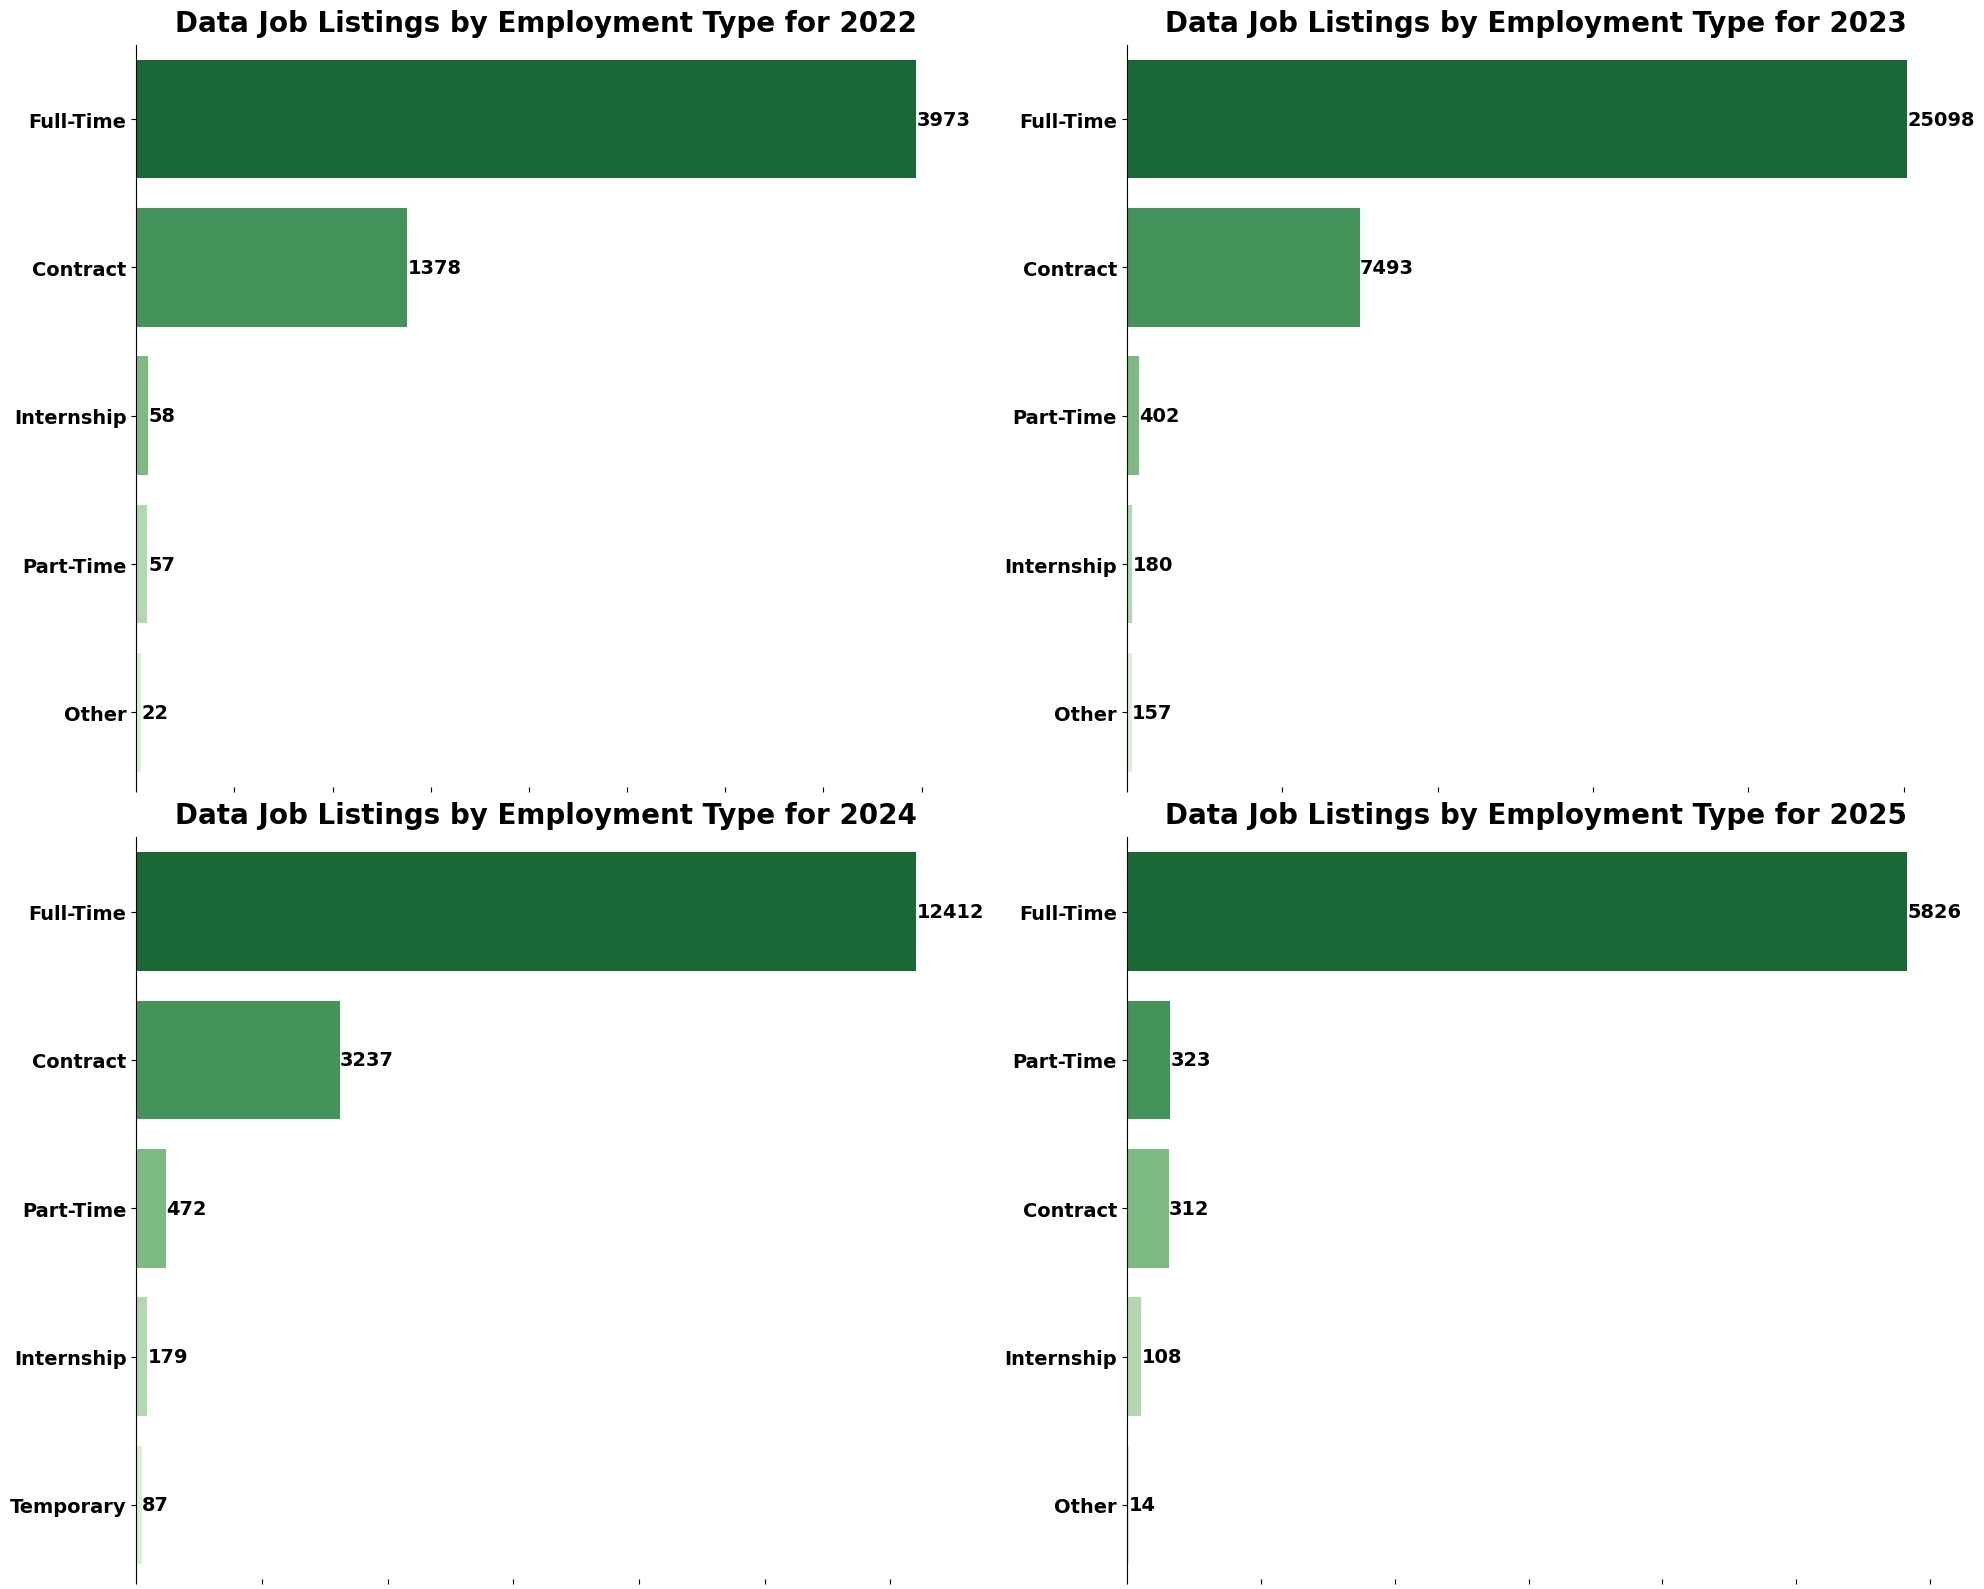

In [70]:
# U.S. Data Job Postings Employment Type Availability from 2022 to 2025 

# List of DataFrames
dfs = [df_2022_schedule, df_2023_schedule, df_2024_schedule, df_2025_schedule]

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Define color palette
palette = sns.color_palette('Greens', n_colors=5)

# Loop through each DataFrame and plot the bar chart
for i, (df, year) in enumerate(zip(dfs, range(2022, 2026))):
    ax = axs.flat[i]  # Access the correct subplot
    sns.barplot(x='count', y='employment_type', data=df, hue='count', ax=ax, palette=palette, orient='h', legend=False)
    ax.set_title(f'Data Job Listings by Employment Type for {year}', fontsize=20, fontweight='bold', pad=10)
  

for ax in axs.flat:
    ax.set_ylabel('', fontsize=14, fontweight='semibold')
    for label in ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('semibold')
             

    # Annotate the bars
    for bar in ax.patches:
        ax.annotate(f'{int(bar.get_width())}', (bar.get_width() + 4, bar.get_y() + bar.get_height() / 2),
                    va='center', fontsize=14, fontweight='semibold', color='black')

# Remove spines for each subplot axis
for ax in axs.flat:
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=True)   

# Remove x-axis labels
for ax in axs.flat:
    ax.set_xlabel('')
    ax.set_xticklabels([])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


## Where Analyst Jobs Were Posted Most Often Between 2022 to 2025

This section identifies the top websites where analyst roles were posted between the years 2022 to 2025. 
It also compares the posting volume and median salary per site.

In [113]:
# Filter the 2022 dataset to include only 'analyst' roles with salary and website information
df_2022_DA = df_2022[df_2022['clean_title'].str.contains('analyst', case=False, na=False)
                     & df_2022['salary_yearly'].notna()
                     & df_2022['website'].notna()
                     ].copy()
# Count the occurrences of each website and select the top 5
website_count_DA_2022 = df_2022_DA['website'].value_counts().head(5).reset_index()
# Calculate the median salary for each website
DA_median_2022_salary = df_2022_DA.groupby('website')['salary_yearly'].median().reset_index()
# Merge the website count and median salary data into a single DataFrame
DA_top_website_with_2022_salary = pd.merge(website_count_DA_2022, DA_median_2022_salary, on='website')
# Rename columns for clarity
DA_top_website_with_2022_salary = DA_top_website_with_2022_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count': 'post_count'})
# Display the resulting DataFrame
DA_top_website_with_2022_salary                                         

,website,post_count,median_salary
0,linkedin,100,96700.5525
1,indeed,59,80000.0000
2,my arklamiss jobs,32,103781.0000
3,wane jobs,18,103781.0000
4,built in,17,122050.0000


In [114]:
# Filter the 2023 dataset to include only 'analyst' roles with salary and website information
df_2023_DA = df_2023[df_2023['clean_title'].str.contains('analyst', case=False, na=False)
                     & df_2023['salary_yearly'].notna()
                     & df_2023['website'].notna()
                     ].copy()
# Count the occurrences of each website and select the top 5
website_count_DA_2023 = df_2023_DA['website'].value_counts().head(5).reset_index()
# Calculate the median salary for each website
DA_median_2023_salary = df_2023_DA.groupby('website')['salary_yearly'].median().reset_index()
# Merge the website count and median salary data into a single DataFrame
DA_top_website_with_2023_salary = pd.merge(website_count_DA_2023, DA_median_2023_salary, on='website')
# Rename columns for clarity
DA_top_website_with_2023_salary = DA_top_website_with_2023_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count': 'post_count'})
# Display the resulting DataFrame
DA_top_website_with_2023_salary

,website,post_count,median_salary
0,linkedin,503,94000.0
1,Recruiter.com,448,96500.0
2,indeed,293,82500.0
3,ai-jobs.net,83,102875.0
4,The Ladders,51,102500.0


In [115]:
# Filter the 2024 dataset to include only 'analyst' roles with salary and website information
df_2024_DA = df_2024[df_2024['clean_title'].str.contains('analyst', case=False, na=False)
                     & df_2024['salary_yearly'].notna()
                     & df_2024['website'].notna()
                     ].copy()
# Count the occurrences of each website and select the top 5
website_count_DA_2024 = df_2024_DA['website'].value_counts().head(5).reset_index()
# Calculate the median salary for each website
DA_median_2024_salary = df_2024_DA.groupby('website')['salary_yearly'].median().reset_index()
# Merge the website count and median salary data into a single DataFrame
DA_top_website_with_2024_salary = pd.merge(website_count_DA_2024, DA_median_2024_salary, on='website')
# Rename columns for clarity
DA_top_website_with_2024_salary = DA_top_website_with_2024_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count': 'post_count'})
# Display the resulting DataFrame
DA_top_website_with_2024_salary

,website,post_count,median_salary
0,linkedin,277,110000.0
1,Bebee,275,100000.0
2,built in,142,109427.5
3,ai-jobs.net,104,99072.5
4,indeed,91,85000.0


In [116]:
# Filter the 2025 dataset to include only 'analyst' roles with salary and website information
df_2025_DA = df_2025[df_2025['clean_title'].str.contains('analyst', case=False, na=False)
                     & df_2025['salary_yearly'].notna()
                     & df_2025['website'].notna()
                     ].copy()
# Count the occurrences of each website and select the top 5
website_count_DA_2025 = df_2025_DA['website'].value_counts().head(5).reset_index()
# Calculate the median salary for each website
DA_median_2025_salary = df_2025_DA.groupby('website')['salary_yearly'].median().reset_index()
# Merge the website count and median salary data into a single DataFrame
DA_top_website_with_2025_salary = pd.merge(website_count_DA_2025, DA_median_2025_salary, on='website')
# Rename columns for clarity
DA_top_website_with_2025_salary = DA_top_website_with_2025_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count': 'post_count'})
# Display the resulting DataFrame
DA_top_website_with_2025_salary

,website,post_count,median_salary
0,linkedin,110,115000.0
1,indeed,81,86236.8
2,governmentjobs.com,42,60000.0
3,aijobs.net,31,129780.0
4,dataanalyst.com,13,87050.0


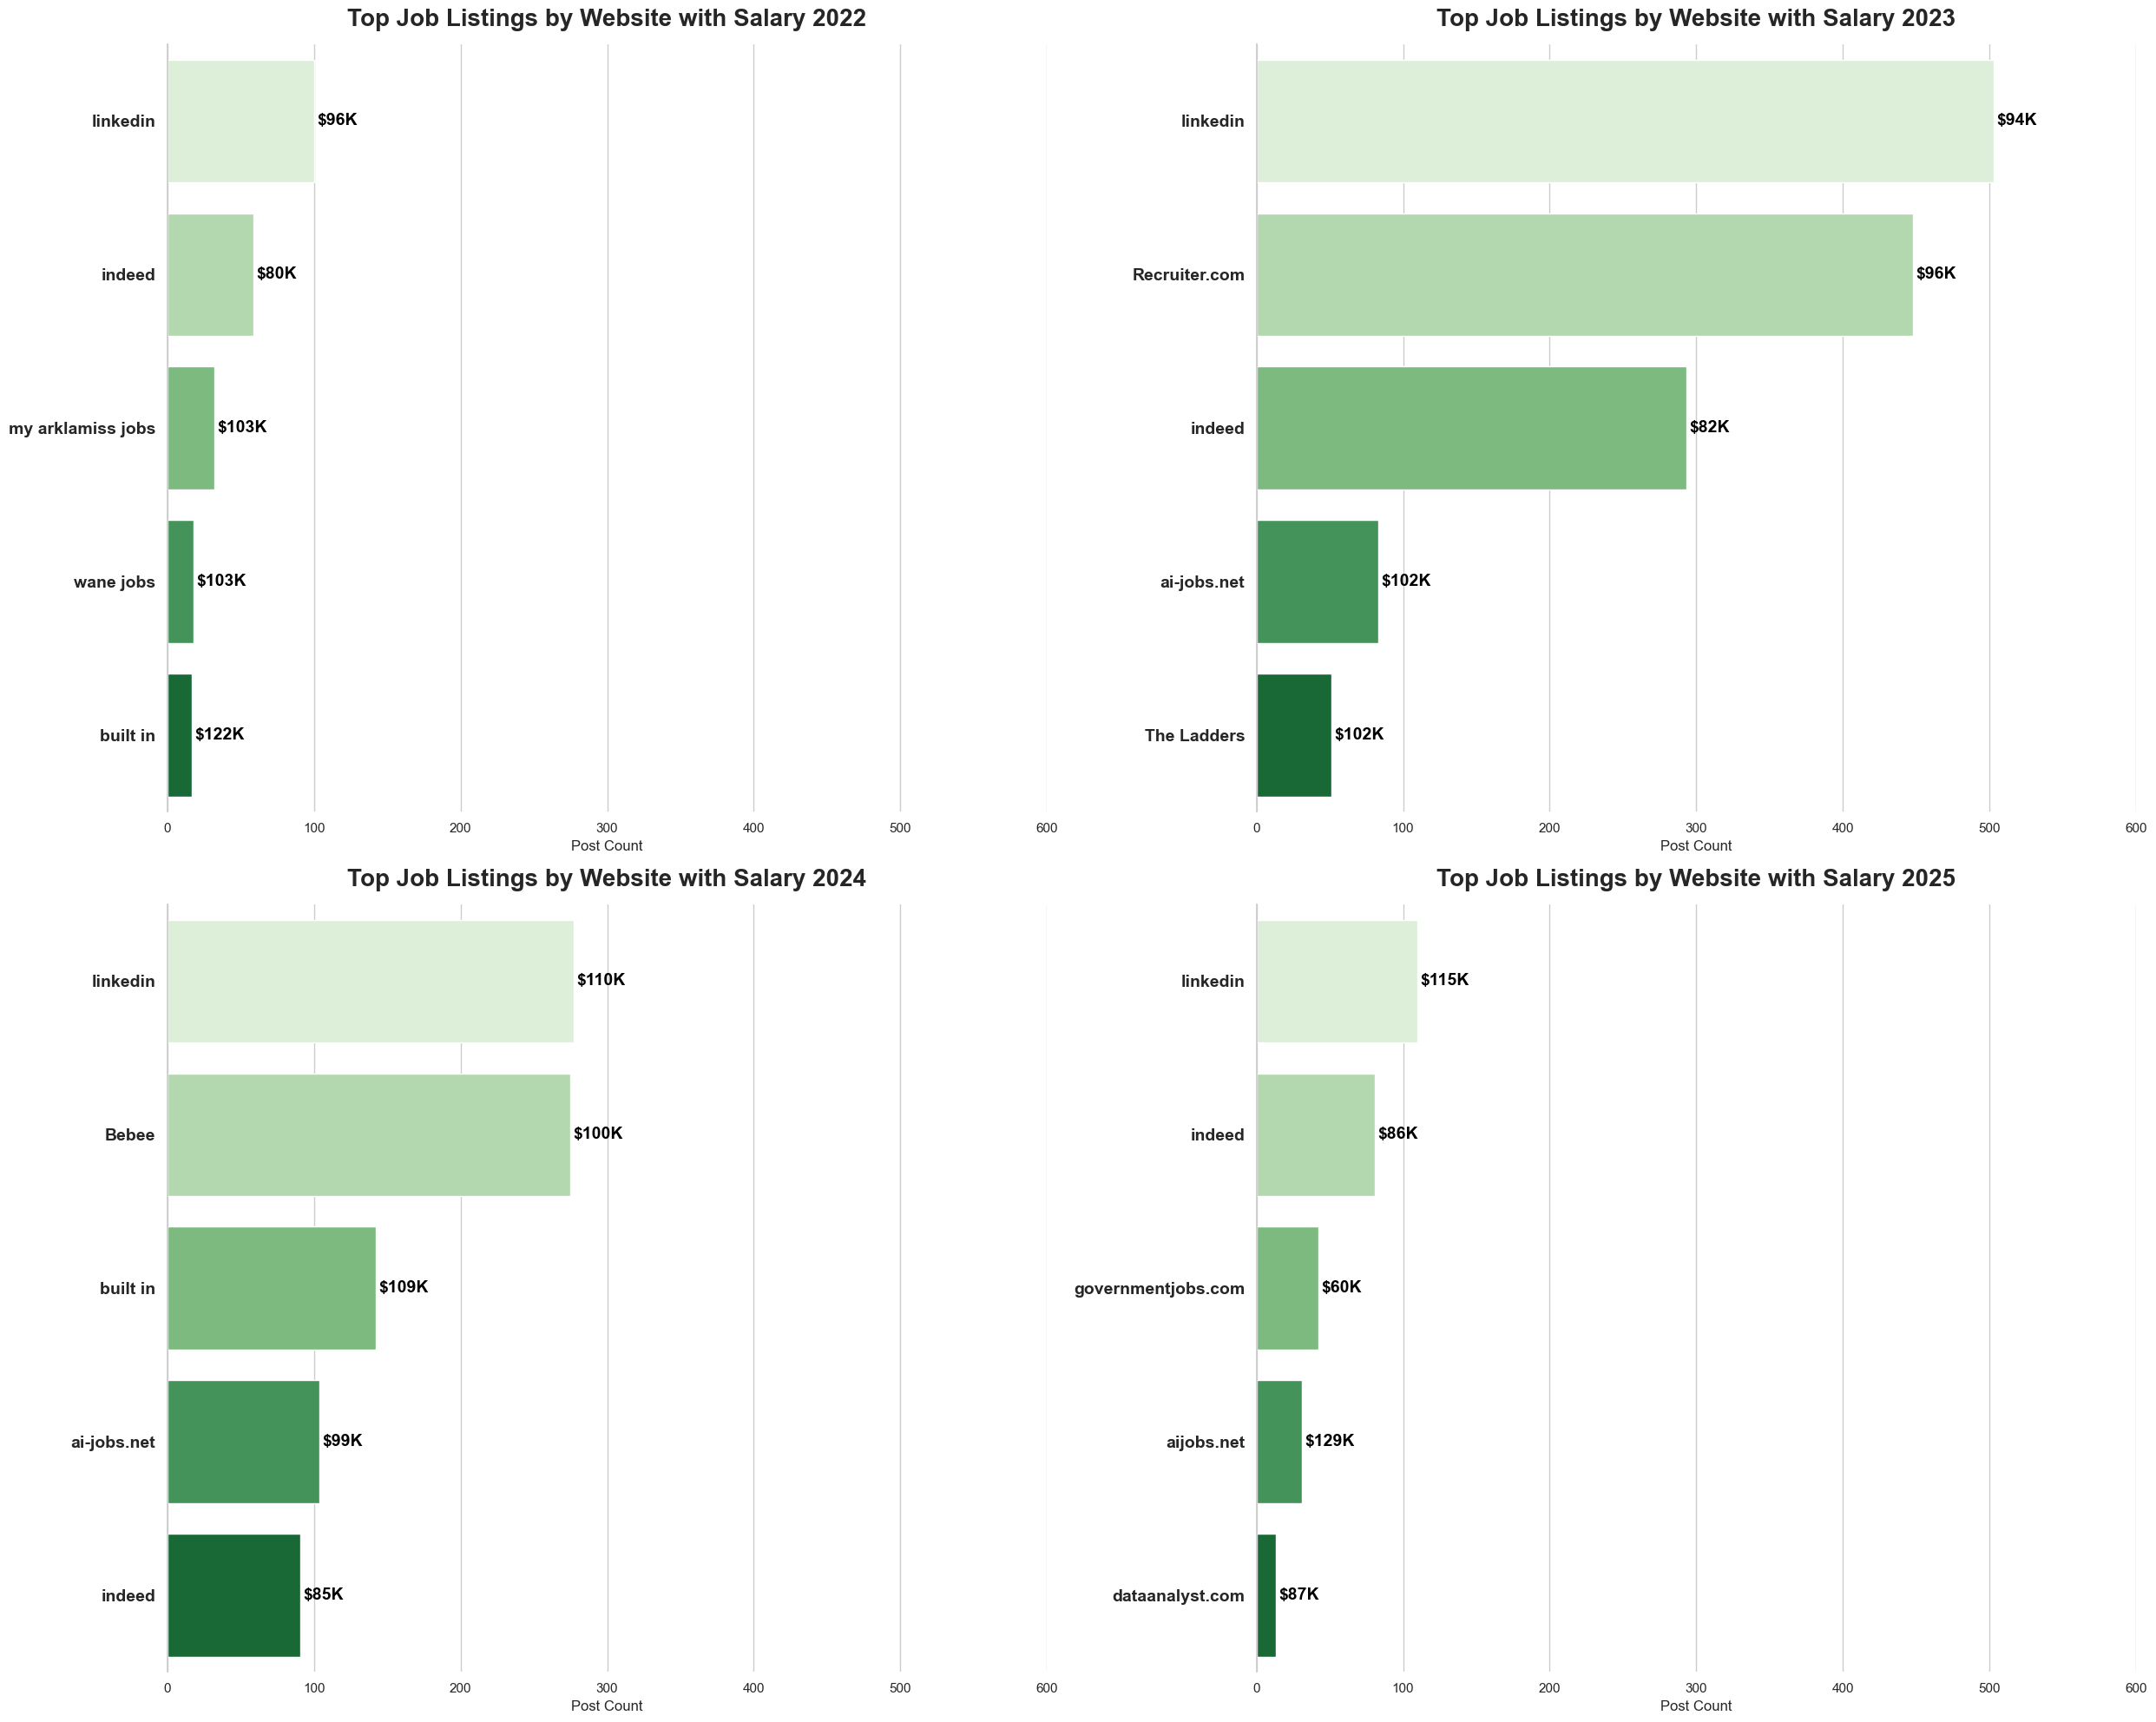

In [123]:
# Top U.S. Job Websites for Analyst Roles from 2022 to 2025 with Salary Data

# List of DataFrames
dfs = [DA_top_website_with_2022_salary, DA_top_website_with_2023_salary, DA_top_website_with_2024_salary, DA_top_website_with_2025_salary]

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(25, 20))

# Define style and color palette
sns.set_theme(style='whitegrid')
palette = sns.color_palette('Greens', n_colors=5)

# Loop through each DataFrame and plot the bar chart
for i, (df, year) in enumerate(zip(dfs, range(2022, 2026))):
    ax = axs.flat[i]  # Access the correct subplot
    sns.barplot(x='post_count', y='website', data=df, hue='website', ax=ax, palette=palette, orient='h', legend=False)
    ax.set_title(f'Top Job Listings by Website with Salary {year}', fontsize=20, fontweight='bold', pad=15)
    ax.set_xlim(0, 600)
    # Annotate Bars with median salaries
    for j, bar in enumerate(ax.patches):
        salary = df['median_salary'].iloc[j]
        ax.annotate(
            f'${int(salary/1000):,}K',  # format salary
            (bar.get_width() + 2, bar.get_y() + bar.get_height() / 2),  # position of the annotation
            va='center',
            fontsize=14,
            fontweight='semibold',
            color='black'
        )

# Remove spines for each subplot axis
for ax in axs.flat:
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=True)

# Format x-axis labels
for ax in axs.flat:
    ax.set_xlabel('Post Count')

# Format the y-axis
for ax in axs.flat:
    ax.set_ylabel('', fontsize=14, fontweight='semibold')
    for label in ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('semibold')     

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()
